Lab 4

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

      0  1  2         3  4    5  6  7
0  1818  1  1  1818.001 -1 -1.0  0  1
1  1818  1  2  1818.004 -1 -1.0  0  1
2  1818  1  3  1818.007 -1 -1.0  0  1
3  1818  1  4  1818.010 -1 -1.0  0  1
4  1818  1  5  1818.012 -1 -1.0  0  1
Epoch [10/50], Loss: 0.004509
Epoch [20/50], Loss: 0.004058
Epoch [30/50], Loss: 0.003363
Epoch [40/50], Loss: 0.002880
Epoch [50/50], Loss: 0.002433


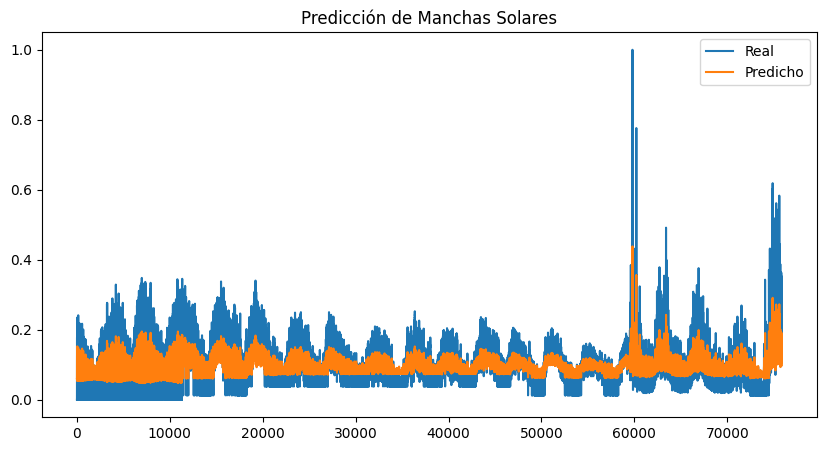

In [ ]:


# ------------------------------
# 1. Cargar el dataset de manchas solares
# ------------------------------
# Cargar los datos de manchas solares desde el archivo CSV descargado
# Asegúrate de tener el archivo en el mismo directorio o usa la ruta completa
url = "sunspot.csv"  # Reemplaza con la ruta de tu archivo
data = pd.read_csv(url, sep=";", header=None)

# Mostrar las primeras filas para ver la estructura del dataset
print(data.head())

# Normalizar la columna de manchas solares (suponiendo que está en la columna 5)
sunspot_data = data[5].values  # Ajusta el índice si la columna cambia
sunspot_data = (sunspot_data - np.min(sunspot_data)) / (np.max(sunspot_data) - np.min(sunspot_data))  # Normalización

# Convertir a tensores
sunspot_data = torch.tensor(sunspot_data, dtype=torch.float32)

# ------------------------------
# 2. Crear dataset con ventanas deslizantes
# ------------------------------
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]  # La siguiente mancha solar a predecir
        xs.append(x)
        ys.append(y)
    return torch.stack(xs), torch.stack(ys)

seq_length = 10  # ventana inicial de 10 pasos
X, y = create_sequences(sunspot_data, seq_length)

# Añadir dimensión batch
X = X.unsqueeze(-1)  # [batch, seq_len, input_size]
y = y.unsqueeze(-1)  # [batch, 1]

# ------------------------------
# 3. Definir el modelo RNN
# ------------------------------
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [batch, seq_len, input_size]
        out, h = self.rnn(x)  # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]   # Tomar la última salida en el tiempo
        out = self.fc(out)    # [batch, output_size]
        return out

model = RNNModel(input_size=1, hidden_size=16, output_size=1)

# ------------------------------
# 4. Entrenamiento
# ------------------------------
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

# ------------------------------
# 5. Predicción
# ------------------------------
model.eval()
with torch.no_grad():
    predictions = model(X).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y.squeeze().numpy(), label="Real")
plt.plot(predictions, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares")
plt.show()


# Seccion 1 ventanas declaradas 5

In [7]:
# Tamaño de ventana pequeño (5)
seq_length_small = 5

# Crear secuencias con tamaño de ventana pequeño
X_small, y_small = create_sequences(sunspot_data, seq_length_small)

# Añadir dimensión batch
X_small = X_small.unsqueeze(-1)  # [batch, seq_len, input_size]
y_small = y_small.unsqueeze(-1)  # [batch, 1]


In [ ]:
# Definir el modelo RNN para tamaño de ventana 5
model_small = RNNModel(input_size=1, hidden_size=16, output_size=1)

# Entrenamiento
optimizer_small = optim.Adam(model_small.parameters(), lr=0.01)
criterion = nn.MSELoss()

start_time = time.time()

num_epochs = 50
for epoch in range(num_epochs):
    model_small.train()
    optimizer_small.zero_grad()
    outputs = model_small(X_small)
    loss = criterion(outputs, y_small)
    loss.backward()
    optimizer_small.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Experiment 1 (Ventana 5) - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

end_time = time.time()
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")


Experiment 1 (Ventana 5) - Epoch [10/50], Loss: 0.003521
Experiment 1 (Ventana 5) - Epoch [20/50], Loss: 0.002634
Experiment 1 (Ventana 5) - Epoch [30/50], Loss: 0.001467
Experiment 1 (Ventana 5) - Epoch [40/50], Loss: 0.001439
Experiment 1 (Ventana 5) - Epoch [50/50], Loss: 0.001377


Presentacion de resultados

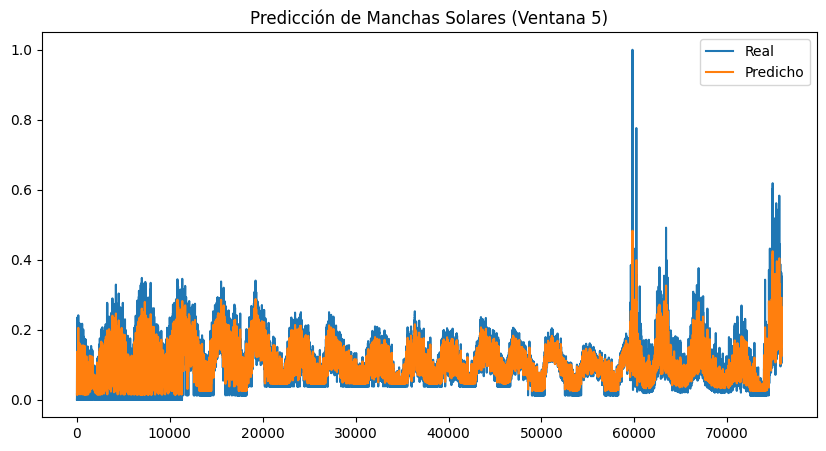

In [9]:
# Predicción para ventana pequeña
model_small.eval()
with torch.no_grad():
    predictions_small = model_small(X_small).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y_small.squeeze().numpy(), label="Real")
plt.plot(predictions_small, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares (Ventana 5)")
plt.show()


Seccion declaracion 20 datos

In [10]:
# Tamaño de ventana mediana (20)
seq_length_medium = 20

# Crear secuencias con tamaño de ventana mediana
X_medium, y_medium = create_sequences(sunspot_data, seq_length_medium)

# Añadir dimensión batch
X_medium = X_medium.unsqueeze(-1)  # [batch, seq_len, input_size]
y_medium = y_medium.unsqueeze(-1)  # [batch, 1]


Entrenamiento

In [ ]:
# Definir el modelo RNN para tamaño de ventana 20
model_medium = RNNModel(input_size=1, hidden_size=16, output_size=1)

# Entrenamiento
optimizer_medium = optim.Adam(model_medium.parameters(), lr=0.01)

start_time = time.time()

for epoch in range(num_epochs):
    model_medium.train()
    optimizer_medium.zero_grad()
    outputs = model_medium(X_medium)
    loss = criterion(outputs, y_medium)
    loss.backward()
    optimizer_medium.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Experiment 2 (Ventana 20) - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")


end_time = time.time()
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")


Experiment 2 (Ventana 20) - Epoch [10/50], Loss: 0.005897
Experiment 2 (Ventana 20) - Epoch [20/50], Loss: 0.005096
Experiment 2 (Ventana 20) - Epoch [30/50], Loss: 0.004296
Experiment 2 (Ventana 20) - Epoch [40/50], Loss: 0.003781
Experiment 2 (Ventana 20) - Epoch [50/50], Loss: 0.003345


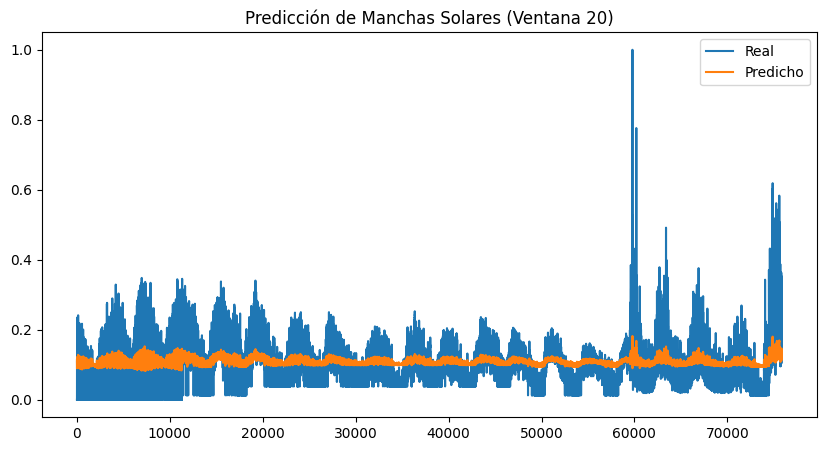

In [12]:
# Predicción para ventana mediana
model_medium.eval()
with torch.no_grad():
    predictions_medium = model_medium(X_medium).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y_medium.squeeze().numpy(), label="Real")
plt.plot(predictions_medium, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares (Ventana 20)")
plt.show()


Declaracion ventana 100

In [13]:
# Tamaño de ventana amplio (100)
seq_length_large = 100

# Crear secuencias con tamaño de ventana amplio
X_large, y_large = create_sequences(sunspot_data, seq_length_large)

# Añadir dimensión batch
X_large = X_large.unsqueeze(-1)  # [batch, seq_len, input_size]
y_large = y_large.unsqueeze(-1)  # [batch, 1]


In [18]:
# Definir el modelo RNN para tamaño de ventana 100
model_large = RNNModel(input_size=1, hidden_size=16, output_size=1)

# Entrenamiento
optimizer_large = optim.Adam(model_large.parameters(), lr=0.01)

start_time = time.time()

for epoch in range(num_epochs):
    model_large.train()
    optimizer_large.zero_grad()
    outputs = model_large(X_large)
    loss = criterion(outputs, y_large)
    loss.backward()
    optimizer_large.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Experiment 3 (Ventana 100) - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}")

end_time = time.time()
print(f"Tiempo total de entrenamiento: {end_time - start_time} segundos")


KeyboardInterrupt: 

Predicción modelo 100

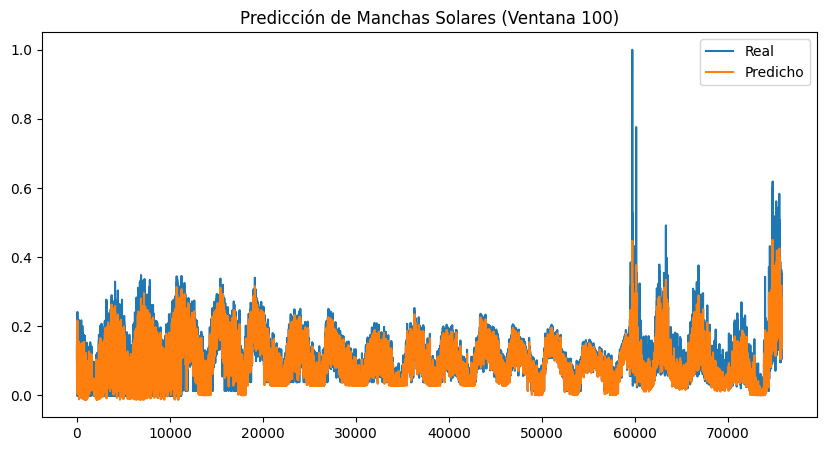

In [16]:
# Predicción para ventana amplia
model_large.eval()
with torch.no_grad():
    predictions_large = model_large(X_large).squeeze().numpy()

# Visualizar los resultados
plt.figure(figsize=(10,5))
plt.plot(y_large.squeeze().numpy(), label="Real")
plt.plot(predictions_large, label="Predicho")
plt.legend()
plt.title("Predicción de Manchas Solares (Ventana 100)")
plt.show()
